## Домашнее задание №1 "Моделирование распределения давления в нагнетательной скважине"
Задание: Реализовать программу по расчёту забойного давления нагнетательной скважины и построить зависимость забойного давления, атм от дебита закачиваемой жидкости, м3/сут (VLP).

При расчёте учитывайте, что температура меняется согласно геотермическому градиенту (нет теплопотерь). В скважину спущена НКТ до верхних дыр перфорации, угол искривления скважины постоянный. Солёность зависит от входной плотности. Диапазон дебитов жидкости для генерации VLP 1 - 400 м3/сут.

Вариант 1

Выполнил студент группы: 5040103/40401
Бахмутов А. В.


# Расчет распределения давления в нагнетательной скважине. Описание алгоритма 

Динамическое забойное давление в нагнетательной скважине может быть получено при помощи уравнения Дарси-Вейсбаха

$$P_{wf} = P_{wh} + \xi \left [ \rho g L \cos \alpha  - \frac{8}{\pi^2} \frac{ f \rho }{ d^5} q ^ 2 L \right ] $$

$P$ - давление 

$P_{wf}$ - забойное давление

$P_{wh}$ - устьевое давление

$\rho$ - плотность воды, кг/м3

$g$ - ускорение свободного падения, кг/м/с2

$\alpha$ - угол отклонения скважины от вертикали, рад

$L$ - измеренная длина скважины, м
 
$d$ - диаметр скважины, м

$q$ - дебит закачиваемой жидкости, м3/сек

$\mu$ - вязкость динамическая, мПа с

$T$ - температура, К

$\xi$ - размерный коэффициент зависящий от выбора системы единиц. При использовании единиц давления в $МПа$ $\xi = \frac{1}{10^6}$, при использовании единиц давления в $бар$ $\xi = \frac{1}{10^5}$.

Градиент давления для произвольного участка скважины можно записать в виде 

$$ \frac{dP}{dL} = \xi \left [ \rho g  \cos \alpha  - 0.815 \frac{f \rho}{d^5} q ^ 2 \right ] $$


Таблица параметров и единиц измерения

|Параметр | СИ   | Практические метрические  | Промыслоавые американские    |
|------   |:------:|:------: |:------:|
|Давление |$Па$    | $Атм$ | $psi$  |
|Температура |${^\circ K}$    | ${^\circ C}$  | ${^\circ F}$  |
|Плотность |$кг / м^3$    | $кг / м^3$ | $кг / м^3$  |
|Ускорение свободного падения |$м / с^2$    | $м / с^2$ | $м / с^2$  |
|Длина |$м$    | $м$ | $ft $ |
|Дебит |$м^3 / с$   | $м^3 / сут$ | $bbl / day$  |
|Вязкость |$Па \cdot с$    | $сП$ | $сП$ |


## Корреляция для плотности воды
Плотность воды существенно зависит от количества растворенных в воде солей. При известной солености воды $w_s$ плотность воды в стандартных условиях может быть определена по корреляции 

$$\rho_w (P_{sc}, T_{sc} ) = (1,0009 - 0.7114 W_s + 0.2605 * W_s ^2) ^ {-1} $$

А изменение плотность воды с изменение температуры может быть рассчитано по выражению

$$\rho_w (P, T ) = \frac{\rho_w (P_{sc}, T_{sc} )} {1+ \frac{ T-273}{10000}(0.269 (T-273)^{0.637}-0.8)} $$

Влиянием давления на плотность воды (сжимаемостью) можно пренебречь. Сжимаемость воды составляет около $4.5 \cdot 10^{-5} \frac{1}{bar} $. При изменении давления в 100 раз (с 1 до 100) плотность воды изменится примерно на 0.05%.

[Соленость](https://en.wikipedia.org/wiki/Salinity) (массовая доля солей) определяется как  $$W_s = \frac{m_s}{m_s+m_w}$$

$m_s$ - масса солей, г

$m_w$ - масса воды, г

Часто определяется от отношение солей в граммка к массе воды в килограммах (или грамм на литр). Иногда встречаются значения солености в частицах на миллион (ppm) или в процентах.

$$1 \% = 0.01 \left [ \frac{г}{г}   \right ] = 10  \left [ \frac{г}{кг} \right ] = 10  \left [ \frac{г}{л} \right ] = 10000  \left [ ppm \right ]$$ 


Типичные значения солености составляют 

| Вода | Соленость, г/г   |
|------|------|
|   чистая   | 0.00001-0.001|
|   морская вода   | 0.035|
|   вода мертвого моря   | >0.2|

Часто на промысле значение солености не известно (не содержится в базе данных), удобнее бывает ориентироваться на плотность воды в стандартных условиях.
При известной плотности воды в стандартных условиях значение солености можно оценить из выражения (обратного выражению для плотности)

$$ W_s = \frac{1}{\rho_w}  \left( 1.36545 \rho_w - (3838.77 \rho_w - 2.009 \rho_w ^2 )^{0.5} \right) $$

Для $\rho_w > 992 \frac{кг}{м^3}$

## Корреляция для расчета вязкости воды

Вязкость воды может быть рассчитана по корреляции Matthews and Russel 

$$ \mu_w= A  (1.8  T - 460) ^ {-B}  (0.9994 + 0.0058  P + 0.6534 \cdot  10 ^ {- 4} \cdot P^2 ) $$

где 

$$A = 109.574 - 0.8406 \cdot 1000  W_s + 3.1331 \cdot 1000  W_s ^2 + 8.7221 \cdot 1000  W_s ^3$$

$$B = 1.1217 - 2.6396  W_s + 6.7946  W_s ^2 + 54.7119  W_s ^ 3 - 155.586  W_s ^4$$

## Число Рейнольдса

Число Рейнольдса определяется выражением 

$$ Re = \frac{\rho V d}{\mu}$$

Для нагнетательной скважины диаметром 89 мм зависимость числа Рейнольдса от дебита приведена на рисунке в расчетной части. Видно, что уже при дебитах более 3 м3/сут $Re > 3000$ и поток будет турбулентным

## Коэффициент трения 

Коэффициент трения Муди $f$ расчитывается для ламинарного потока по формуле 

$$ f= \frac{64}{Re}, Re < 3000 $$

При закачке воды поток не бывает ламинарным (для НКТ с внутренним диаметром 89 мм дебит воды при котором нарушается ламинарность потока составляет около 3 м3/сут)
Для турбулентного режима течения $ Re > 3000 $ коэффициент трения Муди может быть рассчитан по Джейн (3. Swamee, P.K.; Jain, A.K. (1976). "Explicit equations for pipe-flow problems". Journal of the Hydraulics Division. 102 (5): 657–664)

$$ f = \frac{1} {\left [  1.14 - 2  \log \left ( \frac{ \epsilon} {d } + \frac{ 21.25}  { Re ^ {0.9} } \right ) \right ]  ^ 2} $$

или расчет может быть произведен для любых значений числа Рейнольдса $Re$ с использованием корреляции Черчилля (1974)

$$ f =  8  \left[ \left( \frac{8}{Re} \right ) ^{12} + \frac{1}{(A+B)^{1.5}} \right ] ^ {\frac{1}{12}} $$

где

$$ A = \left [- 2.457 \ln \left ( { \left(\frac{7}{Re} \right) ^{0.9} + 0.27 \frac{\epsilon} {d} } \right) \right ] ^{16} $$ 

$$ B = \left( \frac{37530}{Re} \right) ^{16}  $$

$\epsilon$ - шероховатость, м. 

Для НКТ часто берут $\epsilon = 0.000018 м$. Вообще, диапазон изменения значений шероховатости $\epsilon = [0.000015 - 0.000045] м$

# Расчетная часть

In [2]:
# Загрузка библиотек необходимых для отрисовки графиков
import matplotlib
import math as mt
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import odeint, solve_ivp
import pandas as pd
from math import pi
import json

%matplotlib inline

In [3]:
def calc_ws(
        gamma_wat: float
) -> float:
    """
    Функция для расчета солесодержания в воде

    :param gamma_wat: относительная плотность по пресной воде с плотностью 1000 кг/м3, безразм.

    :return: солесодержание в воде, г/г
    """
    ws = (
            1 / (gamma_wat * 1000)
            * (1.36545 * gamma_wat * 1000 - (3838.77 * gamma_wat * 1000 - 2.009 * (gamma_wat * 1000) ** 2) ** 0.5)
    )
    # если значение отрицательное, значит скорее всего плотность ниже допустимой 992 кг/м3
    if ws > 0:
        return ws
    else:
        return 0


def calc_rho_w(
        ws: float,
        t: float
) -> float:
    """
    Функция для расчета плотности воды в зависимости от температуры и солесодержания

    :param ws: солесодержание воды, г/г
    :param t: температура, К

    :return: плотность воды, кг/м3
    """
    rho_w = 1000 * (1.0009 - 0.7114 * ws + 0.2605 * ws ** 2) ** (-1)

    return rho_w / (1 + (t - 273) * 1e-4 * (0.269 * (t - 273) ** 0.637 - 0.8))


def calc_mu_w(
        ws: float,
        t: float,
        p: float
) -> float:
    """
    Функция для расчета динамической вязкости воды по корреляции Matthews & Russel

    :param ws: солесодержание воды, г/г
    :param t: температура, К
    :param p: давление, Па

    :return: динамическая вязкость воды, сПз
    """
    a = (
            109.574
            - (0.840564 * 1000 * ws)
            + (3.13314 * 1000 * ws ** 2)
            + (8.72213 * 1000 * ws ** 3)
    )
    b = (
            1.12166
            - 2.63951 * ws
            + 6.79461 * ws ** 2
            + 54.7119 * ws ** 3
            - 155.586 * ws ** 4
    )

    mu_w = (
            a * (1.8 * t - 460) ** (-b)
            * (0.9994 + 0.0058 * (p * 1e-6) + 0.6534 * 1e-4 * (p * 1e-6) ** 2)
    )
    return mu_w


def calc_n_re(
        rho_w: float,
        q_ms: float,
        mu_w: float,
        d_tub: float
) -> float:
    """
    Функция для расчета числа Рейнольдса

    :param rho_w: плотность воды, кг/м3
    :param q_ms: дебит жидкости, м3/с
    :param mu_w: динамическая вязкость воды, сПз
    :param d_tub: диаметр НКТ, м

    :return: число Рейнольдса, безразмерн.
    """
    v = q_ms / (np.pi * d_tub ** 2 / 4)
    return rho_w * v * d_tub / mu_w * 1000


def calc_ff_churchill(
        n_re: float,
        roughness: float,
        d_tub: float
) -> float:
    """
    Функция для расчета коэффициента трения по корреляции Churchill

    :param n_re: число Рейнольдса, безразмерн.
    :param roughness: шероховатость стен трубы, м
    :param d_tub: диаметр НКТ, м

    :return: коэффициент трения, безразмерн.
    """
    a = (-2.457 * np.log((7 / n_re) ** 0.9 + 0.27 * (roughness / d_tub))) ** 16
    b = (37530 / n_re) ** 16

    ff = 8 * ((8 / n_re) ** 12 + 1 / (a + b) ** 1.5) ** (1/12)
    return ff


def calc_ff_churchill(
        n_re: float,
        roughness: float,
        d_tub: float
) -> float:
    """
    Функция для расчета коэффициента трения по корреляции Churchill

    :param n_re: число Рейнольдса, безразмерн.
    :param roughness: шероховатость стен трубы, м
    :param d_tub: диаметр НКТ, м

    :return: коэффициент трения, безразмерн.
    """
    a = (-2.457 * np.log((7 / n_re) ** 0.9 + 0.27 * (roughness / d_tub))) ** 16
    b = (37530 / n_re) ** 16

    ff = 8 * ((8 / n_re) ** 12 + 1 / (a + b) ** 1.5) ** (1/12)
    return ff

def calc_ff_jain(
        n_re: float,
        roughness: float,
        d_tub: float
) -> float:
    """
    Функция для расчета коэффициента трения по корреляции Jain

    :param n_re: число Рейнольдса, безразмерн.
    :param roughness: шероховатость стен трубы, м
    :param d_tub: диаметр НКТ, м

    :return: коэффициент трения, безразмерн.
    """
    if n_re < 3000:
        ff = 64 / n_re
    else:
        ff = 1 / (1.14 - 2 * np.log10(roughness / d_tub + 21.25 / (n_re**0.9))) ** 2
    return ff

In [4]:
def calc_dp_dl_grav(rho_w: float, angle: float):
    """
    Функция для расчета градиента на гравитацию

    :param rho_w: плотность воды, кг/м3
    :param angle: угол наклона скважины к горизонтали, градусы

    :return: градиент давления на гравитацию в трубе, Па/м
    """
    dp_dl_grav = rho_w * 9.81 * np.sin(angle / 180 * np.pi)
    return dp_dl_grav

def calc_dp_dl_fric(
        rho_w: float,
        mu_w: float,
        q_ms: float,
        d_tub: float,
        roughness: float
):
    """
    Функция для расчета градиента давления на трение

    :param rho_w: плотность воды, кг/м3
    :param mu_w: динамическая вязкость воды, сПз
    :param q_ms: дебит жидкости, м3/с
    :param d_tub: диаметр НКТ, м
    :param roughness: шероховатость стен трубы, м

    :return: градиент давления в трубе, Па/м
    """
    if q_ms != 0:
        n_re = calc_n_re(rho_w, q_ms, mu_w, d_tub)
        ff = calc_ff_churchill(n_re, roughness, d_tub)
        dp_dl_fric = ff * rho_w * q_ms ** 2 / d_tub ** 5
    else:
        dp_dl_fric = 0
    return dp_dl_fric

def calc_dp_dl(
        rho_w: float,
        mu_w: float,
        angle: float,
        q_ms: float,
        d_tub: float,
        roughness: float
) -> float:
    """
    Функция для расчета градиента давления в трубе

    :param rho_w: плотность воды, кг/м3
    :param mu_w: динамическая вязкость воды, сПз
    :param angle: угол наклона скважины к горизонтали, градусы
    :param q_ms: дебит жидкости, м3/с
    :param d_tub: диаметр НКТ, м
    :param roughness: шероховатость стен трубы, м

    :return: градиент давления в трубе, Па/м
    """
    dp_dl_grav = calc_dp_dl_grav(rho_w, angle)

    dp_dl_fric = calc_dp_dl_fric(rho_w, mu_w, q_ms, d_tub, roughness)

    dp_dl = dp_dl_grav - 0.815 * dp_dl_fric

    return dp_dl


## Графики функций

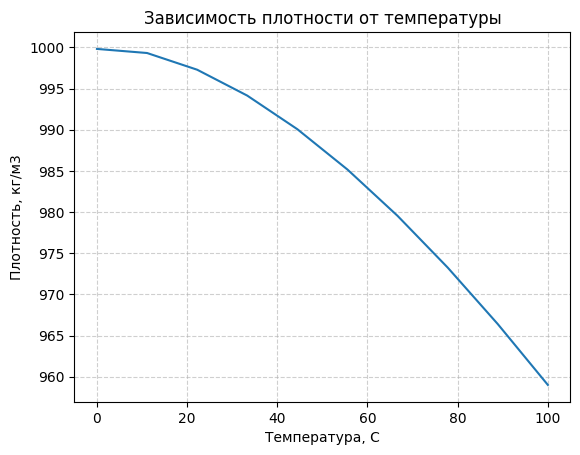

In [5]:
# построения графика функции зависимости плотности воды от температуры
x = np.linspace(0, 100, 10)                          # задание массива значений для построения графика
plt.plot(x, [calc_rho_w(0.001, t+273) for t in x])
plt.title('Зависимость плотности от температуры')
plt.xlabel("Температура, С")
plt.ylabel("Плотность, кг/м3")
plt.grid(True, ls='--', alpha=0.6)
plt.show()

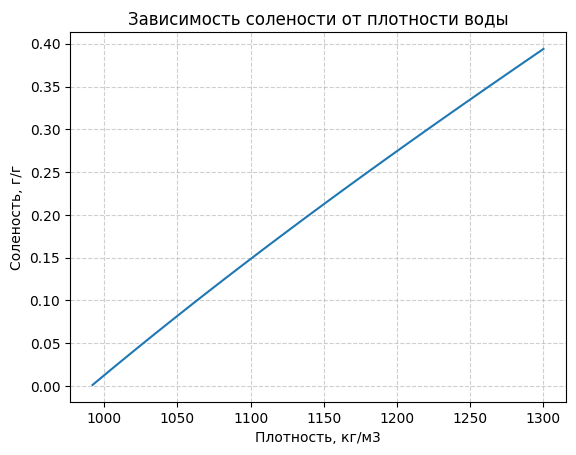

In [6]:
x = np.linspace(992, 1300, 50)                          # задание массива значений для построения графика
plt.plot(x, [calc_ws(gamma_wat/1000) for gamma_wat in x])
plt.title('Зависимость солености от плотности воды')
plt.xlabel("Плотность, кг/м3")
plt.ylabel("Соленость, г/г")
plt.grid(True, ls='--', alpha=0.6)
plt.show()

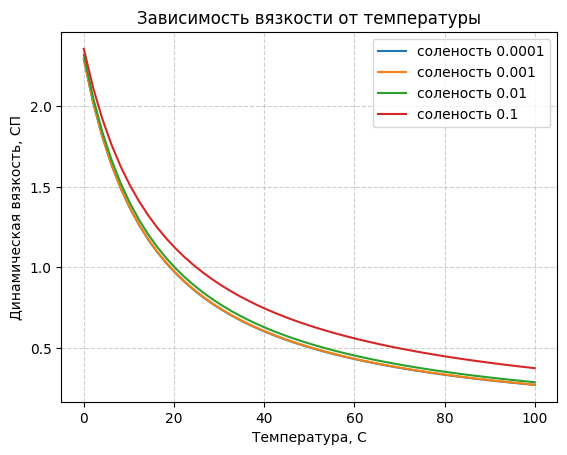

In [7]:
x = np.linspace(0, 100, 50)
plt.plot(x, [calc_mu_w(0.0001, t+273, 1*101325) for t in x], label = "соленость 0.0001")
plt.plot(x, [calc_mu_w(0.001, t+273, 1*101325) for t in x], label = "соленость 0.001")
plt.plot(x, [calc_mu_w(0.01, t+273, 1*101325) for t in x], label = "соленость 0.01")
plt.plot(x, [calc_mu_w(0.1, t+273, 1*101325) for t in x], label = "соленость 0.1")
plt.title('Зависимость вязкости от температуры')
plt.xlabel("Температура, С")
plt.ylabel("Динамическая вязкость, СП")
plt.legend()
plt.grid(True, ls='--', alpha=0.6)
plt.show()

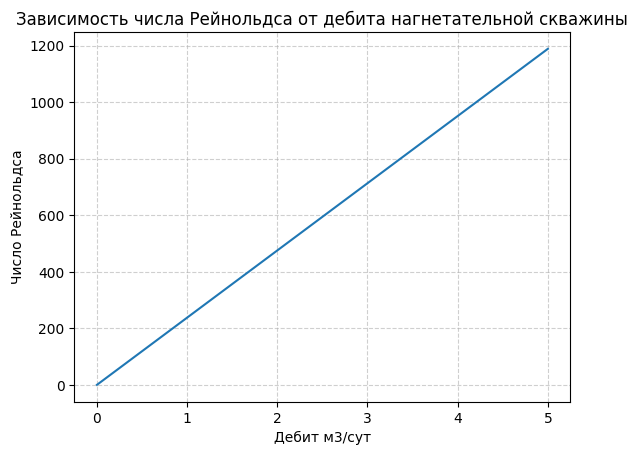

In [8]:
x = np.linspace(0, 5, 50)
plt.plot(x, [calc_n_re(rho_w=1000, q_ms=t/86400, mu_w=1, d_tub=0.062) for t in x])
plt.title('Зависимость числа Рейнольдса от дебита нагнетательной скважины')
plt.xlabel("Дебит м3/сут")
plt.ylabel("Число Рейнольдса")
plt.grid(True, ls='--', alpha=0.6)
plt.show()

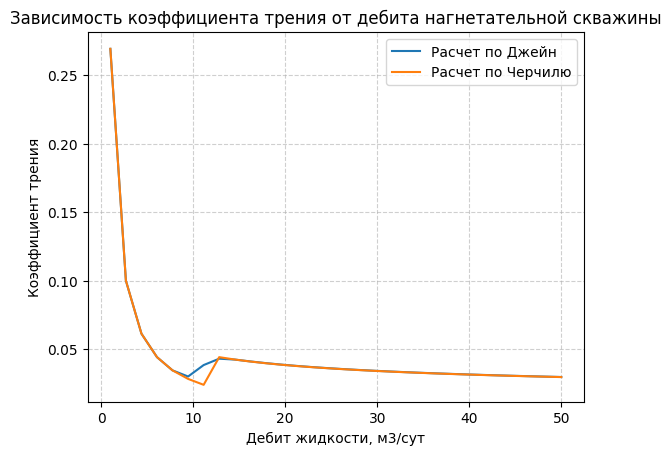

In [9]:
x = np.linspace(1, 50, 30)


n_re_list = [calc_n_re(rho_w=1000, q_ms=t/86400, mu_w=1, d_tub=0.062) for t in x]

plt.plot(x, [calc_ff_churchill(t, 0.0001, 0.62) for t in n_re_list], label ="Расчет по Джейн")
plt.plot(x, [calc_ff_jain(t, 0.0001, 0.62) for t in n_re_list], label ="Расчет по Черчилю")
plt.title('Зависимость коэффициента трения от дебита нагнетательной скважины')
plt.xlabel("Дебит жидкости, м3/сут")
plt.ylabel("Коэффициент трения")
plt.legend()
plt.grid(True, ls='--', alpha=0.6)
plt.show()

На графике зависимости коэффициента трения Муди показаны расчеты выполненные с использованием корреляций Джейна и Черчиля. Видно что корреляции хорошо совпадают друг с другом. Корреляция Черчиля описывает и ламинарный и турбулентный режимы работы

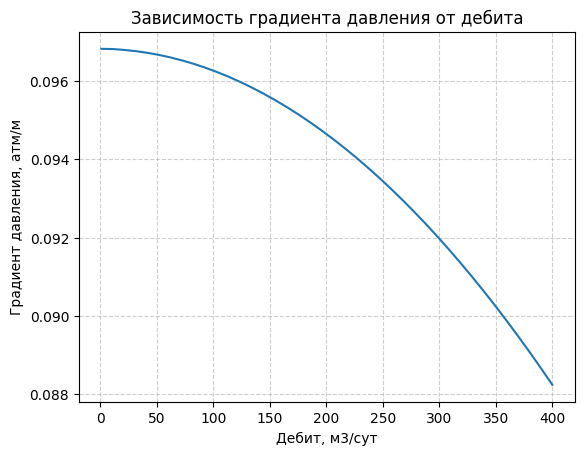

In [10]:
x = np.linspace(1, 400, 40)
plt.plot(x, [calc_dp_dl(rho_w=1000, mu_w=1, angle=90, q_ms=t/86400, d_tub=0.062, roughness=0.001)/101325 for t in x])
plt.title('Зависимость градиента давления от дебита')
plt.xlabel("Дебит, м3/сут")
plt.ylabel("Градиент давления, атм/м")
plt.grid(True, ls='--', alpha=0.6)
plt.show()

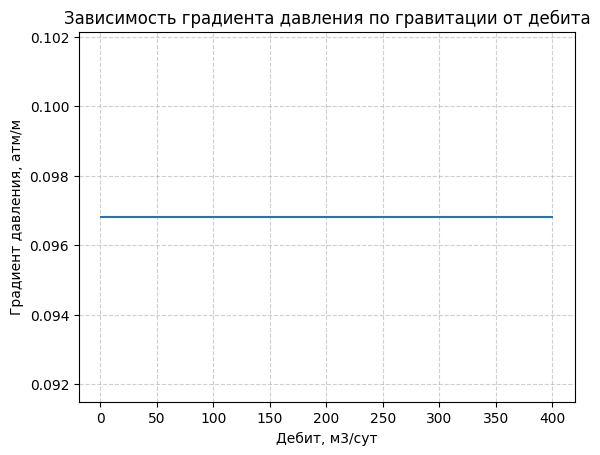

In [11]:
x = np.linspace(1, 400, 40)
plt.plot(x, [calc_dp_dl_grav(rho_w=1000, angle=90)/101325 for t in x])
plt.title('Зависимость градиента давления по гравитации от дебита')
plt.xlabel("Дебит, м3/сут")
plt.ylabel("Градиент давления, атм/м")
plt.grid(True, ls='--', alpha=0.6)
plt.show()

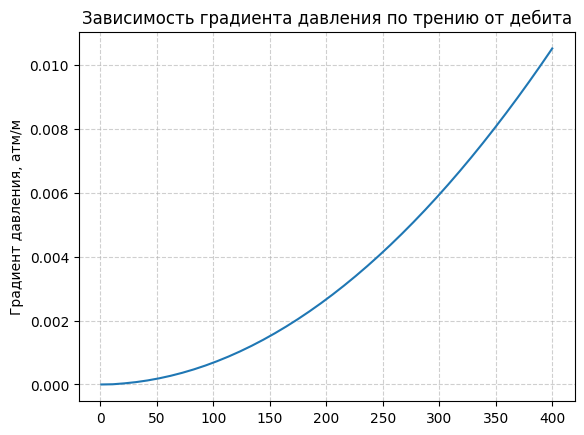

In [12]:
x = np.linspace(1, 400, 40)
plt.plot(x, [calc_dp_dl_fric(rho_w=1000, mu_w=1, q_ms=t/86400, d_tub=0.062, roughness=0.001)/101325 for t in x])
plt.title('Зависимость градиента давления по трению от дебита')
plt.ylabel("Градиент давления, атм/м")
plt.grid(True, ls='--', alpha=0.6)
plt.show()

# Расчет распределения давления 
Для расчета необходимо задать исходные данные и перезапустить расчет

Решение уравнения на распределение давления и температуры в стволе скважины. Решается система двух уравнений вида

$$ \frac{dP}{dL} = \frac{1}{10^{-5}} \left [  \rho g  \cos \alpha  - 0.815 \frac{f \rho}{d^5} q ^ 2  \right ]  $$

$$ \frac{dT}{dL} = geograd $$

Граничные условия задаются на устье скважины


In [13]:
def __integr_func(
        h: float,
        pt: tuple,
        temp_grad: float,
        gamma_wat: float,
        angle: float,
        q_ms: float,
        d_tub: float,
        roughness: float
) -> tuple:
    """
    Функция для интегрирования трубы

    :param h: текущая глубина, м
    :param pt: текущее давление, Па и текущая температура, К
    :param temp_grad: геотермический градиент, К/м * (1e-2)
    :param gamma_wat: относительная плотность по пресной воде с плотностью 1000 кг/м3, безразм.
    :param angle: угол наклона скважины к горизонтали, градусы
    :param q_ms: дебит жидкости, м3/с
    :param d_tub: диаметр НКТ, м
    :param roughness: шероховатость стен трубы, м

    :return: градиенты давления, Па/м и температуры, К/м
    """
    # 0) давление и температура
    p, t = pt
    # 1) солесодержание воды
    ws = calc_ws(gamma_wat)
    # 2) плотность
    rho_w = calc_rho_w(ws, t)
    # 3) вязкость
    mu_w = calc_mu_w(ws, t, p)
    # 4) суммарный градиент давления (трение + гравитация)
    dp_dl = calc_dp_dl(rho_w, mu_w, angle, q_ms, d_tub, roughness)
    # 5) температурный градиент
    dT_dl = temp_grad * 1e-2

    return dp_dl, dT_dl


def calc_pipe(
        p_wh: float,
        t_wh: float,
        h0: float,
        md_vdp: float,
        temp_grad: float,
        gamma_wat: float,
        angle: float,
        q_ms: float,
        d_tub: float,
        roughness: float
) -> tuple:
    """
    Функция для расчета давления и температуры вдоль трубы

    :param p_wh: буферное давление, Па
    :param t_wh: температура жидкости у буферной задвижки, К
    :param h0: начальная глубина, м
    :param md_vdp: глубина верхних дыр перфорации, м
    :param temp_grad: геотермический градиент, К/м * (1e-2)
    :param gamma_wat: относительная плотность по пресной воде, безразм.
    :param angle: угол наклона скважины к горизонтали, градусы
    :param q_ms: дебит жидкости, м3/с
    :param d_tub: диаметр НКТ, м
    :param roughness: шероховатость стен трубы, м

    :return: давление (Па), температура (K), глубины (м)
    """
    # Начальные условия
    y0 = [p_wh, t_wh]

    # Интегрирование от устья к перфорации
    sol = solve_ivp(
        lambda h, y: __integr_func(
            h=h,
            pt=y,
            temp_grad=temp_grad,
            gamma_wat=gamma_wat,
            angle=angle,
            q_ms=q_ms,
            d_tub=d_tub,
            roughness=roughness
        ),
        t_span=(h0, md_vdp),
        y0=y0,
        method="RK45",
        rtol=1e-6,
        atol=1e-3,
        max_step=10.0
    )

    # Проверка решения
    if sol.status < 0 or len(sol.t) == 0:
        raise RuntimeError("Интегрирование не выполнено — пустое решение трубы")

    # Результаты
    h_res = sol.t
    p_res = sol.y[0]
    t_res = sol.y[1]

    return p_res, t_res, h_res


def calc_p_wf(
        p_wh: float,
        t_wh: float,
        h0: float,
        md_vdp: float,
        temp_grad: float,
        gamma_wat: float,
        angle: float,
        q_ms: float,
        d_tub: float,
        roughness: float
) -> float:
    """
    Функция для расчета давления на забое скважины

    :param p_wh: буферное давление, Па
    :param t_wh: температура жидкости у буферной задвижки, К
    :param h0: начальная глубина, м
    :param md_vdp: глубина верхних дыр перфорации, м
    :param temp_grad: геотермический градиент, К/м * (1e-2)
    :param gamma_wat: относительная плотность по пресной воде, безразм.
    :param angle: угол наклона скважины к горизонтали, градусы
    :param q_ms: дебит жидкости, м3/с
    :param d_tub: диаметр НКТ, м
    :param roughness: шероховатость стен трубы, м

    :return: давление на забое скважины, Па
    """
    p_res, t_res, h_res = calc_pipe(
        p_wh=p_wh,
        t_wh=t_wh,
        h0=h0,
        md_vdp=md_vdp,
        temp_grad=temp_grad,
        gamma_wat=gamma_wat,
        angle=angle,
        q_ms=q_ms,
        d_tub=d_tub,
        roughness=roughness
    )

    return float(p_res[-1])


In [14]:
# Исходные данные по варианту 1
input_data = {"gamma_water": 1.0615908140854549, "md_vdp": 2553.3111523163393, "d_tub": 0.08692984491282545, "angle": 66.60594036743713, "roughness": 0.00015246653401645204, "p_wh": 163.1451179421429, "t_wh": 30.09055811254224, "temp_grad": 2.032615532376016}
#input_data = {"gamma_water": 1.0234161726214432, "md_vdp": 2658.8179653586294, "d_tub": 0.07038126190217257, "angle": 75.69418139887297, "roughness": 0.0003897850584166272, "p_wh": 107.53764429251866, "t_wh": 28.64158285127942, "temp_grad": 2.3294714876981493}
# Подготовка данных для расчета
Q = 100 # дебит флюида, м3/cут
q_m3_sec = Q / 86400 # дебит флюида, м3/c
gamma_water = input_data["gamma_water"] # относительная плотность по пресной воде с плотностью 1000 кг/м3, безразм
H = input_data["md_vdp"] # измеренная глубина забоя скважины
d_tub = input_data["d_tub"] # диаметр НКТ, м
angle = input_data["angle"] # угол наклона скважины к горизонтали, градусы
roughness = input_data["roughness"] # шероховатость трубы, м
p_wh = input_data["p_wh"] * 101325 # давление на устье, атм
t_wh = input_data["t_wh"] # температура на устье скважины, С
temp_grad = input_data["temp_grad"] # геотермический градиент, К/м * (1e-2)
h0 = 0

df = pd.DataFrame(data = input_data, index=["Вариант 1"])
df

,gamma_water,md_vdp,d_tub,angle,roughness,p_wh,t_wh,temp_grad
Вариант 1,1.061591,2553.311152,0.08693,66.60594,0.000152,163.145118,30.090558,2.032616


In [15]:
results = calc_pipe(p_wh, t_wh+273, h0=0, md_vdp=H, temp_grad=temp_grad, gamma_wat=gamma_water, angle=angle, q_ms=q_m3_sec, d_tub=d_tub, roughness=roughness)
results
p_res = results[0] / 101325
t_res = results[1] - 273
h_res = results[2]
np.set_printoptions(precision=3, suppress=True)
# print(results)

In [16]:
p_res

array([163.145, 163.156, 163.27 , 164.216, 165.162, 166.108, 167.055,
       168.001, 168.947, 169.893, 170.839, 171.785, 172.731, 173.676,
       174.622, 175.568, 176.513, 177.459, 178.404, 179.35 , 180.295,
       181.24 , 182.186, 183.131, 184.076, 185.021, 185.966, 186.911,
       187.855, 188.8  , 189.745, 190.69 , 191.634, 192.579, 193.523,
       194.467, 195.412, 196.356, 197.3  , 198.244, 199.188, 200.132,
       201.076, 202.02 , 202.963, 203.907, 204.851, 205.794, 206.738,
       207.681, 208.624, 209.568, 210.511, 211.454, 212.397, 213.34 ,
       214.283, 215.225, 216.168, 217.111, 218.053, 218.996, 219.938,
       220.881, 221.823, 222.765, 223.707, 224.649, 225.591, 226.533,
       227.475, 228.417, 229.358, 230.3  , 231.241, 232.183, 233.124,
       234.065, 235.007, 235.948, 236.889, 237.83 , 238.771, 239.711,
       240.652, 241.593, 242.533, 243.474, 244.414, 245.354, 246.295,
       247.235, 248.175, 249.115, 250.055, 250.994, 251.934, 252.874,
       253.813, 254.

In [17]:
t_res

array([30.091, 30.093, 30.117, 30.321, 30.524, 30.727, 30.93 , 31.134,
       31.337, 31.54 , 31.743, 31.947, 32.15 , 32.353, 32.556, 32.76 ,
       32.963, 33.166, 33.369, 33.573, 33.776, 33.979, 34.183, 34.386,
       34.589, 34.792, 34.996, 35.199, 35.402, 35.605, 35.809, 36.012,
       36.215, 36.418, 36.622, 36.825, 37.028, 37.231, 37.435, 37.638,
       37.841, 38.044, 38.248, 38.451, 38.654, 38.858, 39.061, 39.264,
       39.467, 39.671, 39.874, 40.077, 40.28 , 40.484, 40.687, 40.89 ,
       41.093, 41.297, 41.5  , 41.703, 41.906, 42.11 , 42.313, 42.516,
       42.719, 42.923, 43.126, 43.329, 43.533, 43.736, 43.939, 44.142,
       44.346, 44.549, 44.752, 44.955, 45.159, 45.362, 45.565, 45.768,
       45.972, 46.175, 46.378, 46.581, 46.785, 46.988, 47.191, 47.395,
       47.598, 47.801, 48.004, 48.208, 48.411, 48.614, 48.817, 49.021,
       49.224, 49.427, 49.63 , 49.834, 50.037, 50.24 , 50.443, 50.647,
       50.85 , 51.053, 51.256, 51.46 , 51.663, 51.866, 52.07 , 52.273,
      

In [18]:
h_res

array([   0.   ,    0.12 ,    1.315,   11.315,   21.315,   31.315,
         41.315,   51.315,   61.315,   71.315,   81.315,   91.315,
        101.315,  111.315,  121.315,  131.315,  141.315,  151.315,
        161.315,  171.315,  181.315,  191.315,  201.315,  211.315,
        221.315,  231.315,  241.315,  251.315,  261.315,  271.315,
        281.315,  291.315,  301.315,  311.315,  321.315,  331.315,
        341.315,  351.315,  361.315,  371.315,  381.315,  391.315,
        401.315,  411.315,  421.315,  431.315,  441.315,  451.315,
        461.315,  471.315,  481.315,  491.315,  501.315,  511.315,
        521.315,  531.315,  541.315,  551.315,  561.315,  571.315,
        581.315,  591.315,  601.315,  611.315,  621.315,  631.315,
        641.315,  651.315,  661.315,  671.315,  681.315,  691.315,
        701.315,  711.315,  721.315,  731.315,  741.315,  751.315,
        761.315,  771.315,  781.315,  791.315,  801.315,  811.315,
        821.315,  831.315,  841.315,  851.315,  861.315,  871.

Построение графика распределения давления и температуры

Text(0.5, 1.0, 'Распределение температуры в скважине')

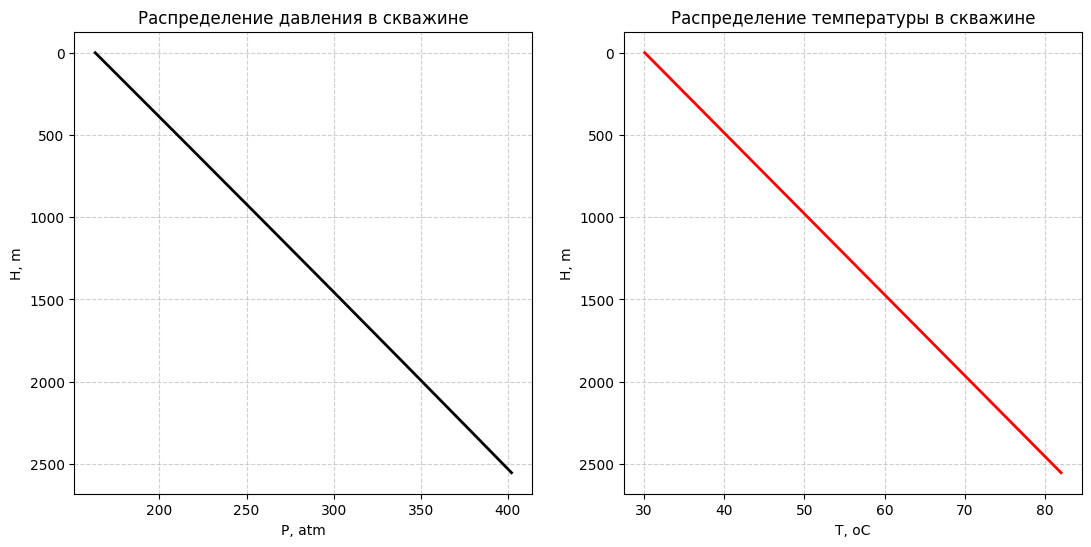

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(13,6))

ax1.plot(p_res, h_res, '-', linewidth=2, color = 'black',   label ="давление")
ax1.set_xlabel("P, atm")
ax1.set_ylabel("H, m")
ax1.invert_yaxis()
ax1.grid(True, ls='--', alpha=0.6)
ax1.set_title('Распределение давления в скважине')

ax2.plot(t_res, h_res,'-', linewidth=2, color = 'red', label ="температура")
ax2.set_xlabel("T, оC")
ax2.set_ylabel("H, m")
ax2.invert_yaxis()
ax2.grid(True, ls='--', alpha=0.6)
ax2.set_title('Распределение температуры в скважине')


Зависимость забойного давления, атм от дебита закачиваемой жидкости, м3/сут (VLP).

           gamma_water       md_vdp    d_tub     angle  roughness        p_wh  \
Вариант 1     1.061591  2553.311152  0.08693  66.60594   0.000152  163.145118   

                t_wh  temp_grad  
Вариант 1  30.090558   2.032616  
{
    "q_liq": [
        0,
        10,
        20,
        30,
        40,
        50,
        60,
        70,
        80,
        90,
        100,
        110,
        120,
        130,
        140,
        150,
        160,
        170,
        180,
        190,
        200,
        210,
        220,
        230,
        240,
        250,
        260,
        270,
        280,
        290,
        300,
        310,
        320,
        330,
        340,
        350,
        360,
        370,
        380,
        390
    ],
    "p_wf": [
        402.30701221081927,
        402.3048821805292,
        402.29758917727804,
        402.28788046414445,
        402.2751681487654,
        402.2595404924085,
        402.2410536507068,
        402.219746070827,
     

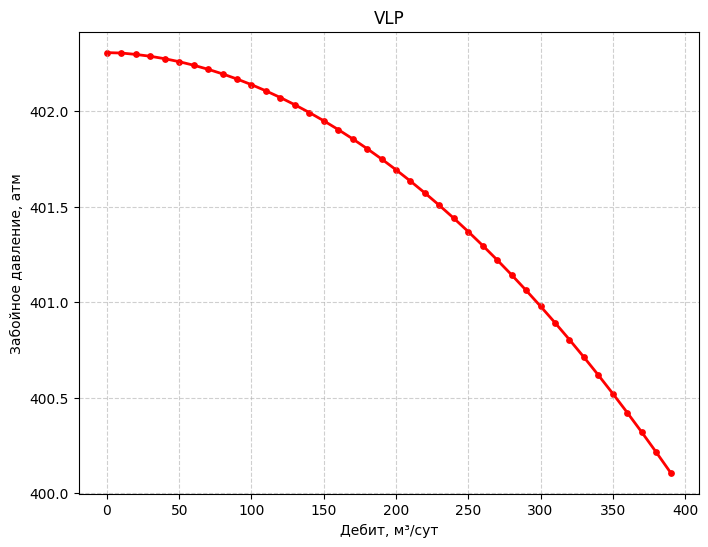

In [20]:
# Подготовка данных для расчета
gamma_water = input_data["gamma_water"] # относительная плотность по пресной воде с плотностью 1000 кг/м3, безразм
H = input_data["md_vdp"] # измеренная глубина забоя скважины
d_tub = input_data["d_tub"] # диаметр НКТ, м
angle = input_data["angle"] # угол наклона скважины к горизонтали, градусы
roughness = input_data["roughness"] # шероховатость трубы, м
p_wh = input_data["p_wh"] * 101325 # давление на устье, атм
t_wh = input_data["t_wh"] # температура на устье скважины, С
temp_grad = input_data["temp_grad"] # геотермический градиент, К/м * (1e-2)
h0 = 0

print(df)

# Диапазон дебитов
q_m3day = np.arange(0, 400, 10)
p_wf_atm = []

# Расчёт забойного давления для каждого значения дебита
for q in q_m3day:
    p_wf_pa = calc_p_wf(
        p_wh=p_wh,
        t_wh=t_wh + 273.15,
        h0=h0,
        md_vdp=H,
        temp_grad=temp_grad,
        gamma_wat=gamma_water,
        angle=angle,
        q_ms=q / 86400,
        d_tub=d_tub,
        roughness=roughness
    )
    p_wf_atm.append(p_wf_pa / 101325)


plt.figure(figsize=(8, 6))
plt.scatter(q_m3day, p_wf_atm, s=15, c = 'r')
plt.plot(q_m3day, p_wf_atm, lw=2, c = 'r')
plt.grid(True, ls='--', alpha=0.6)
plt.xlabel('Дебит, м³/сут')
plt.ylabel('Забойное давление, атм')
plt.title('VLP')


# Формирование JSON
result = {
    "q_liq": q_m3day.tolist(),
    "p_wf": p_wf_atm
}

print(json.dumps(result, indent=4))

with open("output.json", "w", encoding="utf-8") as f:
    json.dump(result, f, indent=4, ensure_ascii=False)
